## Google Colab 환경에서 code 실행

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline

font_path = "C:/Windows/Fonts/malgun.TTF" #맑은 고딕 한글폰트 불러오기
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('public.csv')

In [2]:
def get_target_dic(feature_name, threshold = 50, data_train=data_train):
  dic3 = {}
  for i in range(data_train.shape[0]):
      ekey = data_train[feature_name].iloc[i]
      if ekey in dic3.keys():
          if data_train["우범여부"].iloc[i] == 0:
              dic3[ekey][0] += 1
          else:
              if data_train["핵심적발"].iloc[i] == 1:
                  dic3[ekey][1] += 1
              else:
                  dic3[ekey][2] += 1
                  
      else:
          if data_train["우범여부"].iloc[i] == 0:
              dic3[ekey] = [1,0,0]
          else:
              if data_train["핵심적발"].iloc[i] == 1:
                  dic3[ekey] = [0,1,0]
              else:
                  dic3[ekey] = [0,0,1]

  print("feature 개수 :", len(dic3.keys()))

  minval = 0
  for key in dic3.keys():
    if (dic3[key][0] + dic3[key][1] + dic3[key][2]) < threshold:
      minval += 1

  print("분포가 %d개 미만인 feature 개수 : %d" %(threshold, minval))
  print(dic3)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         37385 non-null  int64  
 1   신고번호       37385 non-null  int64  
 2   신고일자       37385 non-null  object 
 3   신고세관부호     37385 non-null  int64  
 4   수입신고구분코드   37385 non-null  object 
 5   수입거래구분코드   37385 non-null  int64  
 6   수입종류코드     37385 non-null  int64  
 7   징수형태코드     37385 non-null  int64  
 8   운송수단유형코드   37385 non-null  int64  
 9   신고인부호      37385 non-null  object 
 10  수입자        37385 non-null  object 
 11  해외거래처부호    33670 non-null  object 
 12  특송업체부호     6714 non-null   object 
 13  HS10단위부호   37385 non-null  int64  
 14  적출국가코드     37385 non-null  object 
 15  원산지국가코드    37385 non-null  object 
 16  관세율        37385 non-null  float64
 17  관세율구분코드    37385 non-null  object 
 18  원산지표시유무코드  37385 non-null  object 
 19  신고중량(KG)   37385 non-null  float64
 20  과세가격원화

In [4]:
data_train.shape

(37385, 23)

In [5]:
data_train.head(5).transpose()

,0,1,2,3,4
id,0,1,2,3,4
신고번호,97061800,85945189,77854751,46925060,34131149
신고일자,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
신고세관부호,30,40,20,40,20
수입신고구분코드,B,B,B,B,B
수입거래구분코드,11,11,11,11,11
수입종류코드,21,21,21,21,21
징수형태코드,11,11,11,43,11
운송수단유형코드,10,40,40,40,10
신고인부호,ZZR1LT6,SWF9S4X,X4XT6P8,K7LCQTZ,1HMVIVH


In [6]:
data_train.describe()

,id,신고번호,신고세관부호,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,HS10단위부호,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
count,37385.000000,3.738500e+04,37385.000000,37385.000000,37385.000000,37385.000000,37385.000000,3.738500e+04,37385.000000,3.738500e+04,3.738500e+04,37385.000000,37385.000000
mean,18692.000000,5.497960e+07,31.301378,19.543400,20.664170,17.548963,23.220008,6.188834e+09,7.343986,2.978675e+04,3.631615e+06,0.217039,0.227578
std,10792.264243,2.593819e+07,16.057661,24.096993,2.392503,12.319344,15.347790,2.609390e+09,26.357005,7.738496e+05,6.025585e+07,0.412235,0.443700
min,0.000000,1.000328e+07,10.000000,11.000000,11.000000,0.000000,10.000000,1.012910e+08,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9346.000000,3.251508e+07,20.000000,11.000000,21.000000,11.000000,10.000000,3.926909e+09,0.000000,9.600000e+00,4.921000e+02,0.000000,0.000000
50%,18692.000000,5.497514e+07,30.000000,11.000000,21.000000,11.000000,10.000000,6.402919e+09,4.900000,9.500000e+01,9.439460e+03,0.000000,0.000000
75%,28038.000000,7.732828e+07,40.000000,11.000000,21.000000,18.000000,40.000000,8.518299e+09,8.000000,1.490000e+03,2.347860e+05,0.000000,0.000000
max,37384.000000,9.999734e+07,154.000000,100.000000,31.000000,43.000000,90.000000,9.706002e+09,754.300000,6.002500e+07,7.045682e+09,1.000000,2.000000


## Feature 설명 및 분석
- id : id번호, 불필요
- 신고번호 : 신고 건당 매겨지는 번호, id값과 같음, 불필요

---

- 신고일자 : 신고자가 신고서를 제출하는 날짜, 월 / 일 분리가 필요해보임
- 신고세관부호 : 신고물품의 통관을 담당하는 세관 부호
- 수입신고구분코드 : 수입신고 구분 코드
- 수입거래구분코드 : 수입거래구분코드
- 수입종류코드 : 내수용, 수출용 원재료 등 수입종류코드
- 징수형태코드 : 사전납부, 사후납부, 월별납부 등 징수행태
- 운송수단 유형코드 : 선박, 철도, 차량 등 신고물품의 운송수단
- 신고인부호 : 수입신고를 하는 관세사
- 수입자부호 : 물건을 수입하는 실제 화주 (물건 주인)
- 해외거래처부호 : 물품을 거래하는 해외 상대방 거래처 부호
- 특송업체부호 : 세관에 등록된 특급탁송업체 부호
- HS10단위부호 : HS10단위 품목번호
- 적출국가코드 : 해외선적 국가 부호
- 원산지국가코드 : 신고물품의 원산지 
- 관세율 : 관세의 세액을 결정하기 위해 과세표준에 적용되는 비율
- 관세율구분코드 : 세율의 종류
- 원산지표시유무코드 : 물품의 원산지 표시여부, 원산지 표시방법(포장 / 현품)
- 신고중량(KG) : 신고물품의 포장용기를 제외한 중량
- 과세가격 원화금액 : 신고물품의 원화금액

---

- 우범여부 : 신고물품의 검사결과가 이상없으면 0, 이상있으면 1
- 핵심적발 : 내부기준에 따라 비핵심적발(1) 핵심적발(2)로 구분

### 데이터 target 분포 확인

In [7]:
result_notubum = [0, 0, 0]
result_ubum = [0, 0, 0]

for i in range(data_train.shape[0]):
    if data_train["우범여부"].iloc[i] == 0:
        if data_train["핵심적발"].iloc[i] == 0:
            result_notubum[0] += 1
        elif data_train["핵심적발"].iloc[i] == 1:
            result_notubum[1] += 1
        else:
            result_notubum[2] += 1
            
    else:
        if data_train["핵심적발"].iloc[i] == 0:
            result_ubum[0] += 1
        elif data_train["핵심적발"].iloc[i] == 1:
            result_ubum[1] += 1
        else:
            result_ubum[2] += 1
            
print(result_notubum)
print(result_ubum)

[29271, 0, 0]
[0, 7720, 394]


[29271  7720   394]


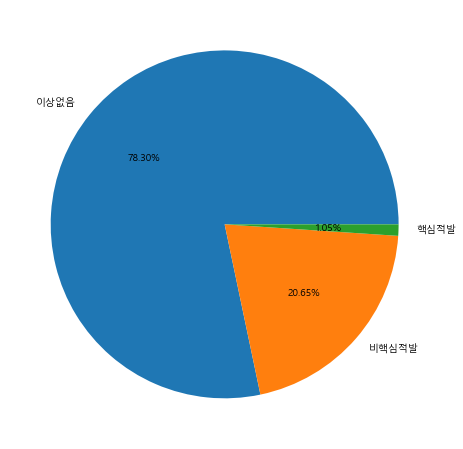

In [8]:
labels = ["이상없음", "비핵심적발", "핵심적발"]
result_notubum = np.array(result_notubum)
result_ubum = np.array(result_ubum)

frequency = result_notubum+result_ubum

print(frequency)

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
ax = fig.add_subplot() ## 프레임 생성
 
ax.pie(x=frequency,labels=labels,autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

우선 우범인 경우와, 비우범인 경우가 나뉘기 때문에 class imbalance의 문제가 나타나고 있다. 또한 핵심적발인 경우와, 비핵심적발인 경우에서는 20배의 차이로, class imbalance가 심하게 나타나고 있다.

## 데이터 전처리

In [104]:
import calendar

# data dic function
def data_dic(data_df, feature_name, threshold=50):
  dic3 = {}
  for i in range(data_df.shape[0]):
      ekey = data_df[feature_name].iloc[i]
      if ekey in dic3.keys():
          if data_df["우범여부"].iloc[i] == 0:
              dic3[ekey][0] += 1
          else:
              if data_df["핵심적발"].iloc[i] == 1:
                  dic3[ekey][1] += 1
              else:
                  dic3[ekey][2] += 1
                  
      else:
          if data_df["우범여부"].iloc[i] == 0:
              dic3[ekey] = [1,0,0]
          else:
              if data_df["핵심적발"].iloc[i] == 1:
                  dic3[ekey] = [0,1,0]
              else:
                  dic3[ekey] = [0,0,1]

  delete_key = []
  for key in dic3.keys():
    if (dic3[key][0] + dic3[key][1] + dic3[key][2]) < threshold:
      delete_key.append(key)
  
  for dkey in delete_key:
    del dic3[dkey]
      
  return dic3

from sklearn import preprocessing

# data preprocess function
def data_preprocess(data_df, one_hot=False, label_encode=False, hs_option=2, two_hs=False):

  # id, number drop
  data_df = data_df.drop(["id", "신고번호"], axis = 1)

  # 신고일자 drop
  data_df = data_df.drop("신고일자", axis = 1)

  # 수입신고구분코드 drop
  data_df = data_df.drop("수입신고구분코드", axis = 1)

  # 부호 통합
  get_list = [("신고인부호", 100), ("수입자", 50), ("해외거래처부호", 50), ("특송업체부호", 50), ("적출국가코드", 50), ("원산지국가코드", 50)]

  for feature_name, threshold in get_list:
    key_dic = data_dic(data_train, feature_name, threshold)
    key_list = []
    for i in range(data_df.shape[0]):
      ekey = data_df[feature_name].iloc[i]
      value = key_dic.get(ekey)
      if value == None:
        key_list.append("NONE")
      else:
        key_list.append(ekey)
    data_df[feature_name] = key_list

  # fillna
  data_df['해외거래처부호'] = data_df['해외거래처부호'].fillna("NONE")
  data_df['특송업체부호'] = data_df['특송업체부호'].fillna("NONE")

  # hs 10 중분류
  # 공공데이터포털에 나와있는 관세청 HSK별 표준품명을 사용해 분류했습니다.
  # https://www.data.go.kr/data/15049720/fileData.do

  data_df_hscode = pd.read_csv('./hsk_name.csv', encoding = 'CP949')
  hs_dic = {}
  for i in range(data_df_hscode.shape[0]):
      hs_dic[data_df_hscode["HS CODE 10"].iloc[i]] = [
          data_df_hscode['관세청 신성질별 분류대분류명'].iloc[i],
          data_df_hscode['관세청 신성질별 분류중분류명'].iloc[i],
          data_df_hscode['관세청 신성질별 분류소분류명'].iloc[i],
          data_df_hscode['관세청 신성질별 분류세분류명'].iloc[i],
          data_df_hscode['관세청 신성질별 분류세세분류명'].iloc[i],
          data_df_hscode['관세청 현행 수입 성질별 분류현행수입3단위분류'].iloc[i]
          #분류세분류코드 나중에는 넣기
      ]
      
  if two_hs:
    hs10_mid = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_mid.append((hs_dic[ekey])[hs_option])

    hs10_low = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_low.append((hs_dic[ekey])[hs_option+1])
        
    hs10_midd = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_midd.append((hs_dic[ekey])[hs_option+2])

    hs10_loww = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_loww.append((hs_dic[ekey])[hs_option+3])

    hs10_se = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_se.append((hs_dic[ekey])[5])
        
    data_df["HS성질분류"] = hs10_se
    data_df["HS10단위부호"] = hs10_loww
    data_df["HS10단위부호_세"] = hs10_midd
    data_df["HS10단위부호_중"] = hs10_low
    data_df["HS10단위부호_대"] = hs10_mid
  
  else:
    hs10_mid = []
    for i in range(data_df.shape[0]):
        ekey = data_df["HS10단위부호"].iloc[i]
        hs10_mid.append((hs_dic[ekey])[hs_option])

    data_df["HS10단위부호"] = hs10_mid

  # 관세율 log
  changed_tax = data_df['관세율']
  log_tax = np.log1p(changed_tax)
  log_tax = np.array(log_tax).reshape(-1, 1)
  data_df['관세율'] = log_tax

  # 신고중량 log
  # data_df[data_df["신고중량(KG)"]>1000000]["신고중량(KG)"] = 1000000
  changed_reportKG = data_df['신고중량(KG)']
  log_reportKG = np.log1p(changed_reportKG)
  log_reportKG = np.array(log_reportKG).reshape(-1, 1)
  data_df['신고중량(KG)'] = log_reportKG

  # 과세가격원화금액 log
  # data_df[data_df["과세가격원화금액"]>100000000]["과세가격원화금액"] = 100000000
  changed_wonmoney = data_df['과세가격원화금액']
  log_wonmoney = np.log1p(changed_wonmoney)
  log_wonmoney = np.array(log_wonmoney).reshape(-1, 1)
  data_df['과세가격원화금액'] = log_wonmoney

  # 레이블 인코딩
  if label_encode:
    label_encoder = preprocessing.LabelEncoder()
    data_df['적출국가코드'] = label_encoder.fit_transform(data_df['적출국가코드'])
    data_df['원산지국가코드'] = label_encoder.fit_transform(data_df['원산지국가코드'])
    data_df['관세율구분코드'] = label_encoder.fit_transform(data_df['관세율구분코드'])
    data_df['원산지표시유무코드'] = label_encoder.fit_transform(data_df['원산지표시유무코드'])
    data_df['HS성질분류'] = label_encoder.fit_transform(data_df['HS성질분류'])
    data_df['HS10단위부호'] = label_encoder.fit_transform(data_df['HS10단위부호'])
    data_df['HS10단위부호_세'] = label_encoder.fit_transform(data_df['HS10단위부호_세'])

  # 원핫 인코딩
  if one_hot:
    data_df = pd.get_dummies(data_df)
    data_df = pd.concat([data_df, pd.get_dummies(data_df["신고세관부호"])], axis = 1)
    data_df = pd.concat([data_df, pd.get_dummies(data_df["수입거래구분코드"])], axis = 1)
    data_df = pd.concat([data_df, pd.get_dummies(data_df["수입종류코드"])], axis = 1)
    data_df = pd.concat([data_df, pd.get_dummies(data_df["징수형태코드"])], axis = 1)
    data_df = pd.concat([data_df, pd.get_dummies(data_df["운송수단유형코드"])], axis = 1)
    data_df = data_df.drop(['신고세관부호', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드'], axis = 1)

  return data_df

# 모델 생성

In [105]:
from sklearn.metrics import accuracy_score

def freight_metrics(y_true_ub, y_pred_ub, y_true_core, y_pred_core, onemodel = False):
  ubum_score = 0
  core_score = 0

  if onemodel == True:
    y_true_ubum = []
    y_pred_ubum = []
    for i in range(len(y_true_core)):
      if y_true_core[i] == 0:
        y_true_ubum.append(0)
      else:
        y_true_ubum.append(1)

      if y_pred_core[i] == 0:
        y_pred_ubum.append(0)
      else:
        y_pred_ubum.append(1)

  else:
    y_true_ubum = y_true_ub
    y_pred_ubum = y_pred_ub

  for i in range(len(y_true_ubum)):
    if y_true_ubum[i] == y_pred_ubum[i]:
      ubum_score += 1

      if y_true_ubum[i] == 1:
        if y_true_core[i] == y_pred_core[i]:
          core_score += 1

  print("우범화물 정확도", accuracy_score(y_true_ubum, y_pred_ubum))
  print("핵심적발 정확도", accuracy_score(y_true_core, y_pred_core))
  print("ubum score:", ubum_score*0.35,"core score:", core_score*0.65)
  print("ubum 만점:", len(y_true_ubum)*0.35)

  return ubum_score*0.35 + core_score*0.65

In [106]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# catboost with hs10
(제출용)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
import copy

data_train_processed = data_preprocess(data_train, one_hot = False, hs_option = 0, two_hs = True)
data_test_processed = data_preprocess(data_test, one_hot = False, hs_option = 0, two_hs = True)

data_train_x = data_train_processed.drop(['우범여부', '핵심적발'], axis=1)
data_train_y_ub = data_train_processed['우범여부']
data_train_y_co = data_train_processed['핵심적발']

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True) #총 5번의 fold 진행
n = 0 #x번째 fold인지 기록

target_pred_ub = []
target_pred_co = []

for train_index, valid_index in skf.split(data_train_x, data_train_y_co):
    n += 1
    val_pred_name = [] # validation pred model 이름 저장
    val_pred_ub = []   # validation set pred 결과 저장
    val_pred_co = []   # validation set pred 결과 저장

    train_X = np.array(data_train_x)
    train_Y_ub = np.array(data_train_y_ub)
    train_Y_co = np.array(data_train_y_co)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train_ub, y_valid_ub = train_Y_ub[train_index], train_Y_ub[valid_index]
    y_train_co, y_valid_co = train_Y_co[train_index], train_Y_co[valid_index]
    
    X_test = np.array(data_test_processed)

    ### Create Model ###
    
    ###모델을 생성하고 집어넣으면 됩니다.
    
    ### CatBoostRegressor ###
    model = CatBoostClassifier(iterations = 5000, verbose = 200, auto_class_weights = 'Balanced', learning_rate = 0.07, depth = 7,
                               random_state = 42, cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 19, 20], 
                               eval_metric = 'Accuracy', ignored_features=[5, 6, 7, 8])
    model.fit(X_train, y_train_ub, use_best_model=True, eval_set = (X_valid, y_valid_ub), early_stopping_rounds = 400)
    
    val_pred_name.append("우범 CatBoostClassifier")      # 모델 이름 저장
    val_pred_ub.append(model.predict_proba(X_valid))   # validation set pred 결과 저장
    target_pred_ub.append(model.predict_proba(X_test)) # test set pred 결과 

    model = CatBoostClassifier(iterations = 3000, verbose = 200, auto_class_weights = 'Balanced', learning_rate = 0.075, depth = 7,
                               random_state = 42, cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 19, 20],
                               eval_metric = 'Accuracy', ignored_features=[5, 6, 7, 8], task_type="GPU")
    model.fit(X_train, y_train_co, use_best_model=True, eval_set = (X_valid, y_valid_co), early_stopping_rounds = 400)

    val_pred_name.append("핵심 CatBoostClassifier")      # 모델 이름 저장
    val_pred_co.append(model.predict_proba(X_valid))   # validation set pred 결과 저장
    target_pred_co.append(model.predict_proba(X_test)) # test set pred 결과 저장

    val_pred_ub_changed = copy.deepcopy(val_pred_ub[0])
    val_pred_ub_changed = np.argmax(val_pred_ub_changed, axis = -1)
    val_pred_co_changed = copy.deepcopy(val_pred_co[0])
    val_pred_co_changed = np.argmax(val_pred_co_changed, axis = -1)

    for i in range(len(val_pred_ub_changed)):
        if val_pred_ub_changed[i] == 0 and val_pred_co_changed[i] != 0:
            val_pred_co_changed[i] = 0

    for i in range(len(val_pred_ub_changed)):
        if val_pred_ub_changed[i] == 1 and val_pred_co_changed[i] == 0:
            val_pred_co_changed[i] = 1

    print("========== fold %d ==========" %(n))
    print("%s model ubum score : %0.4f" %(val_pred_name[0], freight_metrics(y_valid_ub, val_pred_ub_changed, y_valid_co, val_pred_co_changed)))

0:	learn: 0.5874632	test: 0.5952574	best: 0.5952574 (0)	total: 109ms	remaining: 9m 5s
200:	learn: 0.7278759	test: 0.7327502	best: 0.7327502 (200)	total: 23.8s	remaining: 9m 28s
400:	learn: 0.7876843	test: 0.7545504	best: 0.7545504 (400)	total: 50.7s	remaining: 9m 41s
600:	learn: 0.8229864	test: 0.7618243	best: 0.7647196 (570)	total: 1m 14s	remaining: 9m 7s
800:	learn: 0.8521566	test: 0.7713195	best: 0.7720548 (798)	total: 1m 38s	remaining: 8m 38s
1000:	learn: 0.8751071	test: 0.7804789	best: 0.7806162 (988)	total: 2m 3s	remaining: 8m 14s
1200:	learn: 0.8942059	test: 0.7869869	best: 0.7877099 (1095)	total: 2m 28s	remaining: 7m 49s
1400:	learn: 0.9071614	test: 0.7945749	best: 0.7949685 (1396)	total: 2m 50s	remaining: 7m 19s
1600:	learn: 0.9213218	test: 0.7940323	best: 0.7958140 (1574)	total: 3m 13s	remaining: 6m 51s
1800:	learn: 0.9335933	test: 0.8014006	best: 0.8023250 (1777)	total: 3m 36s	remaining: 6m 23s
2000:	learn: 0.9434489	test: 0.8058247	best: 0.8065264 (1991)	total: 3m 58s	remai

0:	learn: 0.5164897	test: 0.4699758	best: 0.4699758 (0)	total: 25.7ms	remaining: 1m 16s
200:	learn: 0.7953843	test: 0.6603001	best: 0.6603451 (199)	total: 4.4s	remaining: 1m 1s
400:	learn: 0.8417967	test: 0.6680057	best: 0.6744219 (362)	total: 8.84s	remaining: 57.3s
600:	learn: 0.8694943	test: 0.6932110	best: 0.6936637 (592)	total: 13.4s	remaining: 53.5s
800:	learn: 0.8907750	test: 0.7027972	best: 0.7069687 (794)	total: 18s	remaining: 49.3s
1000:	learn: 0.9065849	test: 0.7081790	best: 0.7135876 (989)	total: 22.6s	remaining: 45s
1200:	learn: 0.9205199	test: 0.7132622	best: 0.7139427 (1092)	total: 27.2s	remaining: 40.7s
1400:	learn: 0.9303952	test: 0.7153379	best: 0.7191563 (1373)	total: 31.8s	remaining: 36.3s
1600:	learn: 0.9411292	test: 0.7212984	best: 0.7249225 (1532)	total: 36.4s	remaining: 31.8s
1800:	learn: 0.9477465	test: 0.7169421	best: 0.7249225 (1532)	total: 41s	remaining: 27.3s
bestTest = 0.7249224548
bestIteration = 1532
Shrink model to first 1533 iterations.
========== fold 

In [ ]:
final_pred_ub = np.array(target_pred_ub[0])
for i in range(1, 5):
    final_pred_ub += target_pred_ub[i]
final_pred_ub = np.argmax(final_pred_ub, axis = -1)

final_pred_co = np.array(target_pred_co[0])
for i in range(1, 5):
    final_pred_co += target_pred_co[i]
final_pred_co = np.argmax(final_pred_co, axis = -1)

for i in range(len(final_pred_ub)):
    if final_pred_ub[i] == 0 and final_pred_co[i] != 0:
        final_pred_co[i] = 0
    
for i in range(len(final_pred_ub)):
    if final_pred_ub[i] == 1 and final_pred_co[i] == 0:
        final_pred_co[i] = 1

In [231]:
sample_submission = pd.DataFrame(data_test["신고번호"])
sample_submission["우범여부"] = final_pred_ub
sample_submission["핵심적발"] = final_pred_co
sample_submission.head(5)

,신고번호,우범여부,핵심적발
0,56839011,0,0
1,64859691,0,0
2,99950077,0,0
3,22601387,0,0
4,33240058,0,0


In [254]:
sample_submission.shape

(8134, 3)

In [255]:
val_pred_ub_changed.shape

(7477,)

In [234]:
sample_submission.to_csv('./sub4_copy1.csv', index=False)

### 데이터 target 분포 확인

In [232]:
result_notubum = [0, 0, 0]
result_ubum = [0, 0, 0]

for i in range(sample_submission.shape[0]):
    if sample_submission["우범여부"].iloc[i] == 0:
        if sample_submission["핵심적발"].iloc[i] == 0:
            result_notubum[0] += 1
        elif sample_submission["핵심적발"].iloc[i] == 1:
            result_notubum[1] += 1
        else:
            result_notubum[2] += 1
            
    else:
        if sample_submission["핵심적발"].iloc[i] == 0:
            result_ubum[0] += 1
        elif sample_submission["핵심적발"].iloc[i] == 1:
            result_ubum[1] += 1
        else:
            result_ubum[2] += 1
            
print(result_notubum)
print(result_ubum)

[6492, 0, 0]
[0, 1584, 58]


[6492 1584   58]


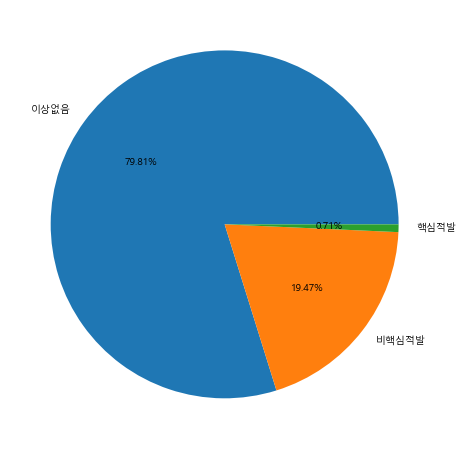

In [233]:
labels = ["이상없음", "비핵심적발", "핵심적발"]
result_notubum = np.array(result_notubum)
result_ubum = np.array(result_ubum)

frequency = result_notubum+result_ubum

print(frequency)

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
ax = fig.add_subplot() ## 프레임 생성
 
ax.pie(x=frequency,labels=labels,autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()